Data Generation  and Visualization

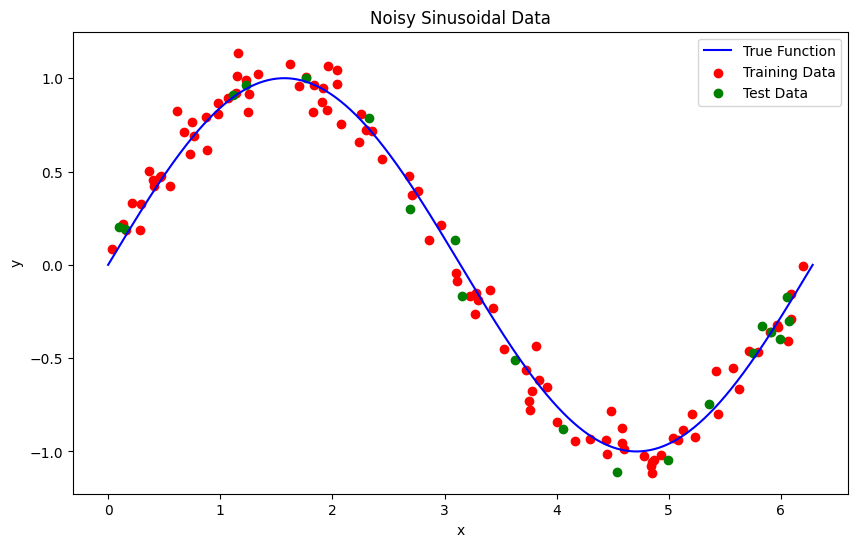

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def generate_data(x):
    return np.sin(x) + np.random.normal(0,0.1,size=x.shape)

x_train = np.random.uniform(0, 2*np.pi, 100)
y_train = generate_data(x_train)

x_test = np.random.uniform(0,2*np.pi,20)
y_test = generate_data(x_test)

x_true = np.linspace(0, 2*np.pi, 1000)
y_true = np.sin(x_true)

plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label='True Function', color='blue')
plt.scatter(x_train, y_train, label='Training Data', color='red')
plt.scatter(x_test, y_test, label='Test Data', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Sinusoidal Data')
plt.show()



Polynomial Ridge Regression

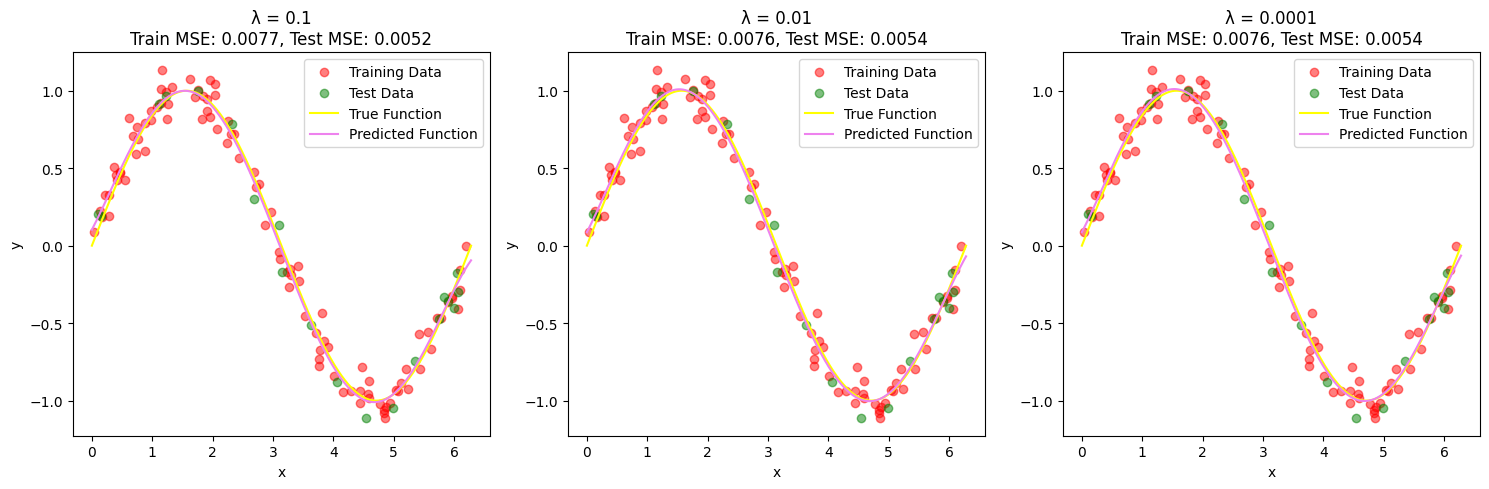

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
# import nbimporter
# import Data_generation

# Assuming these variables are defined in data_generation.ipynb
# x_train = Data_generation.x_train
# y_train = Data_generation.y_train
# x_test = Data_generation.x_test
# y_test = Data_generation.y_test
# x_true = Data_generation.x_true
# y_true = Data_generation.y_true

def polynomial_ridge_regression(X, y, X_test, y_test, degree, lambda_val):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))

    # (ii) Closed-form solution for ridge regression 
    w = np.linalg.solve(X_poly.T @ X_poly + lambda_val * np.eye(X_poly.shape[1]), X_poly.T @ y)
    y_train_pred = X_poly @ w
    y_test_pred = X_test_poly @ w
    train_mse = mean_squared_error(y, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    return w, poly, train_mse,  test_mse

    

# (iii) Experiment with different lambda values
lambda_values = [0.1, 0.01, 0.0001]
degree = 6

plt.figure(figsize=(15, 5))
for i, lambda_val in enumerate(lambda_values):
    w, poly, train_mse, test_mse = polynomial_ridge_regression(x_train, y_train, x_test, y_test, degree, lambda_val)

    X_true_poly = poly.transform(x_true.reshape(-1, 1))
    y_true_pred = X_true_poly @ w

    plt.subplot(1, 3, i+1)
    plt.scatter(x_train, y_train, color='red', alpha=0.5, label='Training Data')
    plt.scatter(x_test, y_test, color='green', alpha=0.5, label='Test Data')
    plt.plot(x_true, y_true, color='yellow', label='True Function')
    plt.plot(x_true, y_true_pred, color='Violet', label='Predicted Function')
    plt.title(f'λ = {lambda_val}\nTrain MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')

plt.tight_layout()
plt.show()

Kernal Ridge Regression with Polynomial Kernel

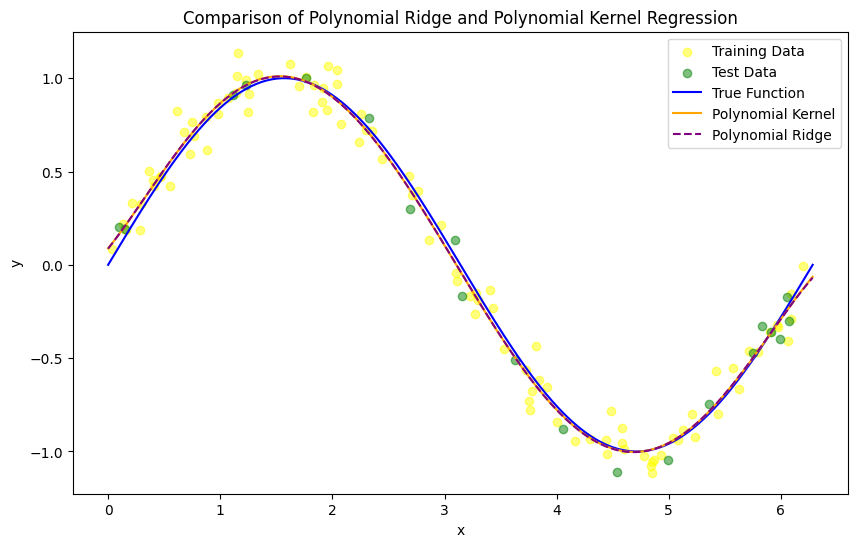

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming generated data is available

def polynomial_kernel(X1, X2, degree=6, c=1):
    return (X1 @ X2.T + c) ** degree

def kernel_ridge_regression(X_train, y_train, X_test, lambda_val, kernel_func):
    K_train = kernel_func(X_train, X_train)
    alpha = np.linalg.solve(K_train + lambda_val * np.eye(len(X_train)), y_train)

    K_test = kernel_func(X_test, X_train)
    y_pred = K_test @ alpha

    return y_pred, alpha

# Reshape data for kernel methods
x_train_reshaped = x_train.reshape(-1, 1)
x_test_reshaped = x_test.reshape(-1, 1)
x_true_reshaped = x_true.reshape(-1, 1)

# Use the optimal lambda from part (b)
lambda_val = 0.01  # This should be the optimal value found in part (b)

y_true_pred_kernel, alpha = kernel_ridge_regression(
    x_train_reshaped, y_train, x_true_reshaped, lambda_val,
    lambda X1, X2: polynomial_kernel(X1, X2, degree=6, c=1)
)

# Compare with polynomial ridge regression from part (b)
w, poly, _, _ = polynomial_ridge_regression(x_train, y_train, x_test, y_test, 6, lambda_val)
X_true_poly = poly.transform(x_true.reshape(-1, 1))
y_true_pred_poly = X_true_poly @ w

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='yellow', alpha=0.5, label='Training Data')
plt.scatter(x_test, y_test, color='green', alpha=0.5, label='Test Data')
plt.plot(x_true, y_true, color='blue', label='True Function')
plt.plot(x_true, y_true_pred_kernel, color='orange', label='Polynomial Kernel')
plt.plot(x_true, y_true_pred_poly, color='purple', linestyle='--', label='Polynomial Ridge')
plt.legend()
plt.title('Comparison of Polynomial Ridge and Polynomial Kernel Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Kernal Ridge Regression with RBF Kernel

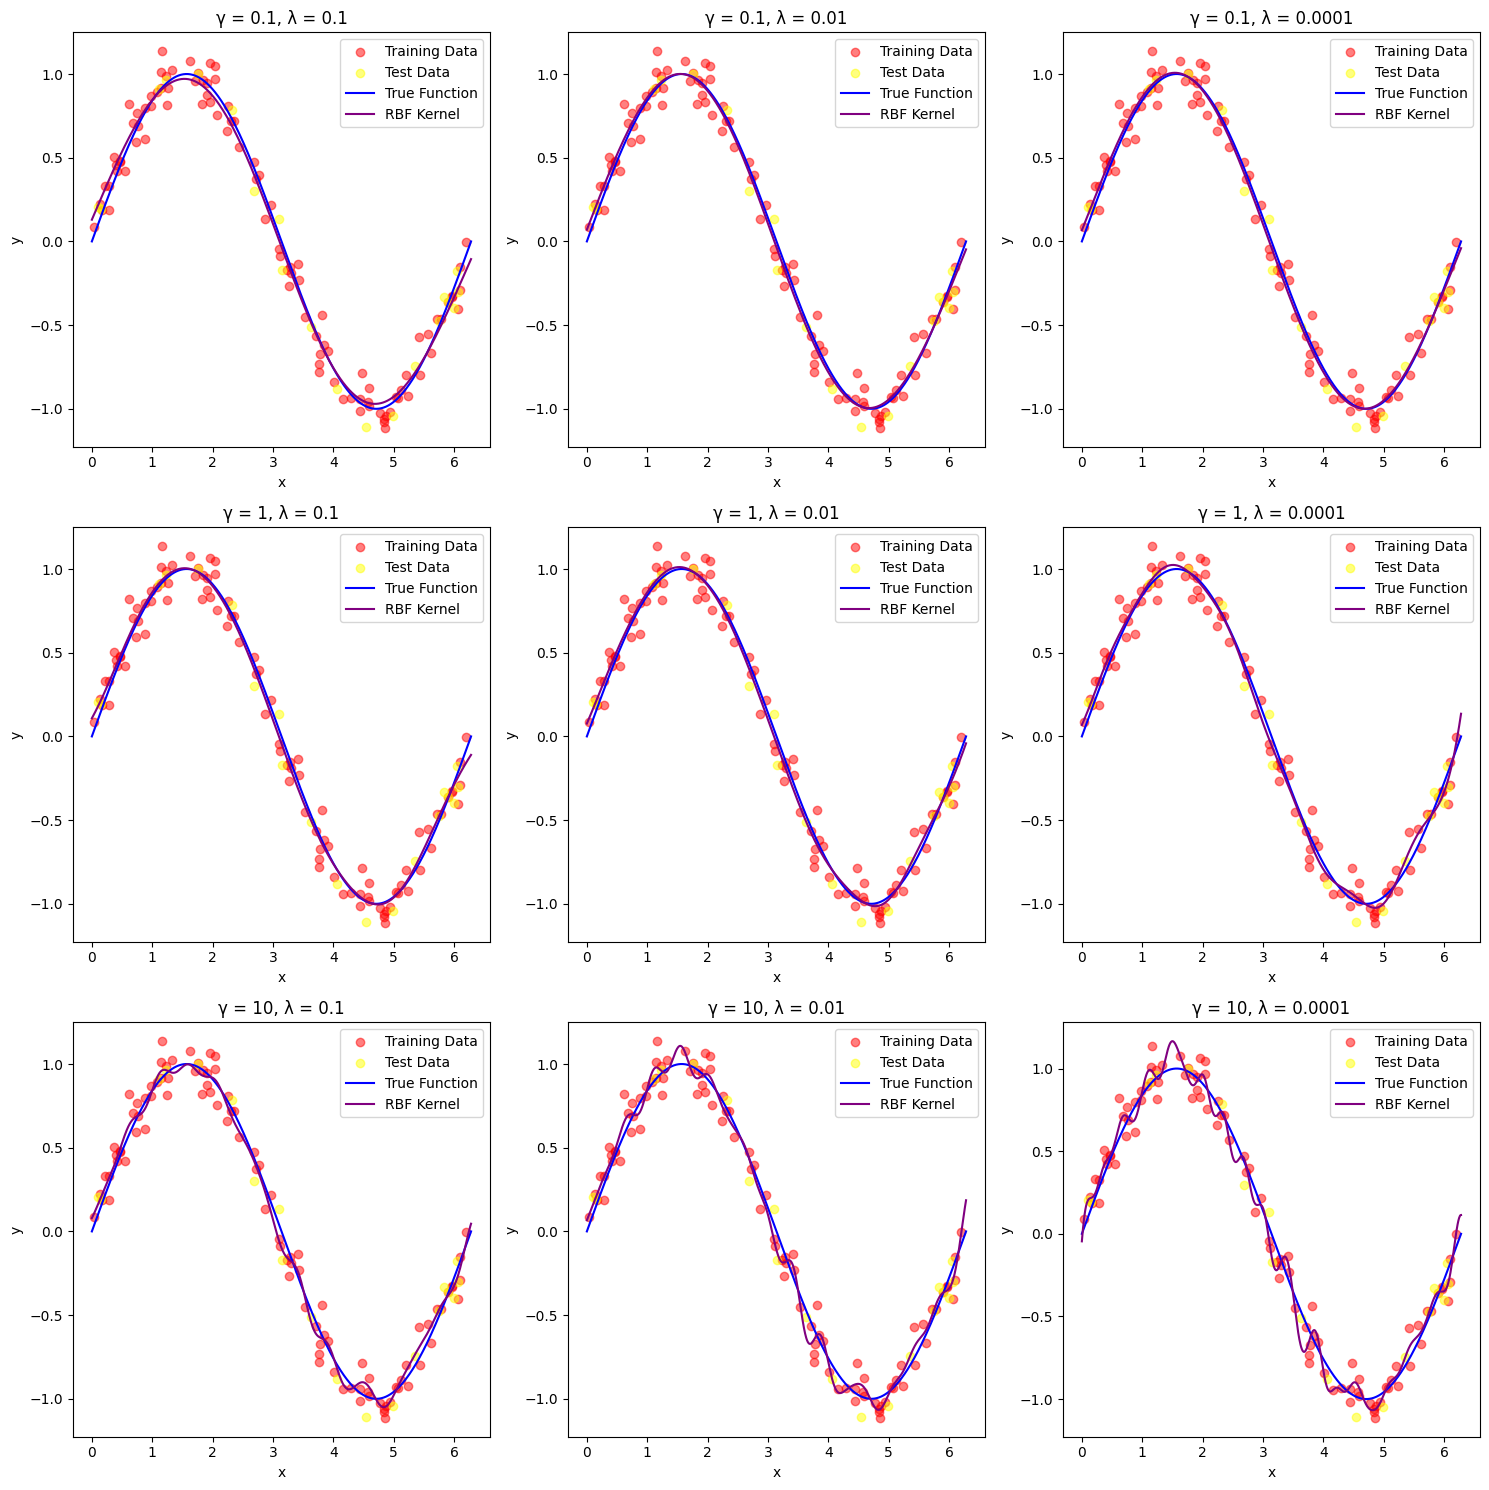

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming generated data is available

def rbf_kernel(X1, X2, gamma):
    return np.exp(-gamma * np.sum((X1[:, np.newaxis] - X2[np.newaxis, :]) ** 2, axis=2))

# Experiment with different gamma and lambda values
gamma_values = [0.1, 1, 10]
lambda_values = [0.1, 0.01, 0.0001]

plt.figure(figsize=(15, 15))
for i, gamma in enumerate(gamma_values):
    for j, lambda_val in enumerate(lambda_values):
        y_true_pred_rbf, _ = kernel_ridge_regression(
            x_train_reshaped, y_train, x_true_reshaped, lambda_val,
            lambda X1, X2: rbf_kernel(X1, X2, gamma)
        )

        plt.subplot(3, 3, i*3 + j + 1)
        plt.scatter(x_train, y_train, color='red', alpha=0.5, label='Training Data')
        plt.scatter(x_test, y_test, color='yellow', alpha=0.5, label='Test Data')
        plt.plot(x_true, y_true, color='blue', label='True Function')
        plt.plot(x_true, y_true_pred_rbf, color='purple', label='RBF Kernel')
        plt.title(f'γ = {gamma}, λ = {lambda_val}')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')

plt.tight_layout()
plt.show()

# Select the best performing model based on visual inspection or MSE
# Plot it separately for a clearer view